# NUMPY 

In [207]:
import numpy as np

In this chapter, we wil review some of the most important numpy functions. If you want to understand better all the functionalities of `numpy`, you can go to its website: https://numpy.org/doc/1.18/reference/index.html <br/>
This session's index is as follows:
- **Numpy arrays**
    - ndim, shape, size, len, reshape, flat
    - arange, linspace, logspace
- **Manipulation of arrays**
    - .sum, .max, .min, .mean, .std, .diff, .cumsum (axis)
    - replication of arrays (tile)
    - where, nonzero
    - argmin, argmax
- **Indexing**
    - arrays of indices
    - boolean indexing
- **Linear Algebra // Matrix manipulation**
    - dot
    - diagonal
    - transpose
    - eye
    - trace
    - lower/upper triangle


# 1. Numpy arrays
There are several numpy functions that allow us to create arrays and know their properties. <br/>
Let's create a 1D array and a 2D array:

In [10]:
array1D = np.array([0,1,2,3,4,5])
array2D = np.array([array1D,array1D,array1D])
print('array 1D: \n', array1D)
print('array 2D: \n', array2D)

array 1D: 
 [0 1 2 3 4 5]
array 2D: 
 [[0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]]


### `np.ndim`
Know the number of dimensions of the arrays.

In [11]:
print('ndim arrray1D: ', np.ndim(array1D))
print('ndim arrray2D: ', np.ndim(array2D))

ndim arrray1D:  1
ndim arrray2D:  2


### `np.shape`
Know the length of each dimension of the array.

In [12]:
print('shape arrray1D: ', np.shape(array1D))
print('shape arrray2D: ', np.shape(array2D))

shape arrray1D:  (6,)
shape arrray2D:  (3, 6)


### `np.size`
Know the overall size  of the array.

In [13]:
print('size arrray1D: ', np.size(array1D))
print('size arrray2D: ', np.size(array2D))

size arrray1D:  6
size arrray2D:  18


### `np.reshape`
Reshape an array into a desired shape. <br/>
The final shape should have the same number of elements as the original. Let's take as an example the 2D array 3x6 (18 elements) and we want to reshape it to 6x3 (18 elements).

In [14]:
array_reshaped = np.reshape(array2D,(6,3))
print('original 2D array: \n', array2D)
print('shape arrray2D: ', np.shape(array2D))
print('reshaped 2D array: \n', array_reshaped)
print('shape reshaped array: ', np.shape(array_reshaped))

original 2D array: 
 [[0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]]
shape arrray2D:  (3, 6)
reshaped 2D array: 
 [[0 1 2]
 [3 4 5]
 [0 1 2]
 [3 4 5]
 [0 1 2]
 [3 4 5]]
shape reshaped array:  (6, 3)


### `np.ndarray.flatten`
This function allows us to flatten a ndarray. Let's flatten the reshaped array.

In [15]:
flatten = np.ndarray.flatten(array_reshaped)
print(flatten)
print(np.ndim(flatten))

[0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 4 5]
1


It is the same as reshaping the original array into 1 x 18. If you want to flatten an array to just one dimension, you don't have to add `(1,n)` but just `(n)`.


In [16]:
reshaped_flatten = np.reshape(array2D,18)
print(reshaped_flatten)
print(np.ndim(reshaped_flatten))

[0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 4 5]
1


## Buidling arrays
### `np.arange`
In previous sessions we saw the use of `range`, which allowed us to iterate over integers. If we want to create an array spanning a range of integers usinge `range`, we have to do the following:

In [17]:
# initialize the array as a list (you could also create an empty array)
array_range = []
for i in range(3,8):
    array_range.append(i)
# convert to array
array_range = np.array(array_range)
print(array_range)

[3 4 5 6 7]


There is an easy way to create this array: `np.arange(start,stop,step,dtype)`

In [18]:
array_range = np.arange(start = 3, stop = 8, step = 1,dtype = int)
print(array_range)

[3 4 5 6 7]


Take into account that `stop >= start` and `step != 0`. <br/>
We can also change the step and the type: 

In [19]:
array_range2 = np.arange(0,100,10,dtype = float)
print(array_range2)

[ 0. 10. 20. 30. 40. 50. 60. 70. 80. 90.]


### `np.linspace`
We have already seen this function, but let's review it. `np.linspace(start, stop, num,...)`. It allows us to create a linear space between two points `[start, stop]` and with as many element as `num`. 

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


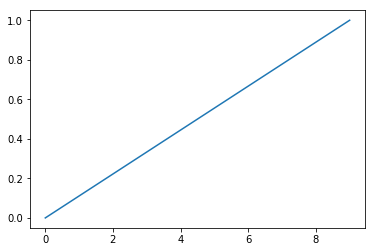

In [20]:
import matplotlib.pyplot as plt
array_linspace = np.linspace(start = 0, stop = 1, num = 10)
print(array_linspace)
plt.figure()
plt.plot(array_linspace)

In this case, `stop` can be greater, lesser or equal than `start`, and `num`can be `0`.

In [21]:
array_linspace = np.linspace(start = 0, stop = 0, num = 0)
print(array_linspace)

[]


### `np.logspace`
It works similar as the `np.linspace` but in this case, points are logarithmically distributed in space: `np.linspace(start, stop, num, base...)`. If `base` argument is not defined, `base = 10` (logarithm with base 10)

[   1.            2.15443469    4.64158883   10.           21.5443469
   46.41588834  100.          215.443469    464.15888336 1000.        ]


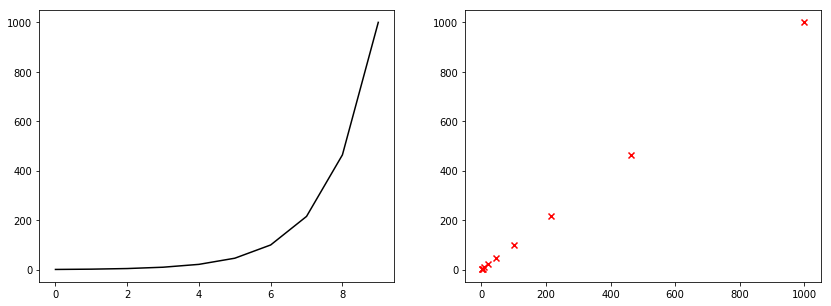

In [22]:
array_logspace = np.logspace(start = 0, stop = 3,num = 10, base = 10)
print(array_logspace)
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14,5))
axes[0].plot(array_logspace, c = 'k')
axes[1].scatter(array_logspace, array_logspace, marker = 'x', c = 'r')

# 2. Manipulation of arrays
In this chapter, we review some of the most common used functions from numpy.
### `np.sum`
This allows us to sum the numbers of an array. If the array is n-dimensional, we should specify the `axis`(dimension) where we want to perform the sum of the elements. <br/>
**1D array**

In [23]:
print(array1D)
print(np.sum(array1D))

[0 1 2 3 4 5]
15


**2D array**<br/>
if we don't specify the `axis`, the sum will be performed across the entire n-dimensional array. If `axis` is specified, the function returns the sum of the elements along the specified dimension. 

In [24]:
array2D = np.array([array1D,2*array1D,3*array1D])
print(array2D)
print('sum with axis not specified:\n', np.sum(array2D)) 
print('sum along dim 0:\n', np.sum(array2D, axis = 0)) # sum along dim 1
print('sum along dim 1:\n' , np.sum(array2D, axis = 1)) # sum along dim 2

[[ 0  1  2  3  4  5]
 [ 0  2  4  6  8 10]
 [ 0  3  6  9 12 15]]
sum with axis not specified:
 90
sum along dim 0:
 [ 0  6 12 18 24 30]
sum along dim 1:
 [15 30 45]


### `np.max` and `np.min`
These functions are similar to the ones from Python. We can get the maximum or minimum of an array. If the array is n-dimensional, we can also specify the axis or not if we just want to obtain the max or min of the entire array. 


In [25]:
print(array2D)
print('Axis not specified:\n max: ', np.max(array2D), '\n min: ', np.min(array2D)) 
print('Axis = 0:\n max: ', np.max(array2D, axis = 0), '\n min: ', np.min(array2D, axis = 0)) 
print('Axis = 1:\n max: ', np.max(array2D, axis = 1), '\n min: ', np.min(array2D, axis = 1)) 

[[ 0  1  2  3  4  5]
 [ 0  2  4  6  8 10]
 [ 0  3  6  9 12 15]]
Axis not specified:
 max:  15 
 min:  0
Axis = 0:
 max:  [ 0  3  6  9 12 15] 
 min:  [0 1 2 3 4 5]
Axis = 1:
 max:  [ 5 10 15] 
 min:  [0 0 0]


### `np.mean` and `np.std`
These functions allow you to compute the mean and standard deviation along a given axis. If axis is not specified, it will be computed along the entire array.

In [26]:
print(array2D)
print('mean with no axis specified: \n', np.mean(array2D))
print('mean along axis 0: \n', np.mean(array2D, axis = 0))
print('mean along axis 1: \n', np.mean(array2D, axis = 1))

[[ 0  1  2  3  4  5]
 [ 0  2  4  6  8 10]
 [ 0  3  6  9 12 15]]
mean with no axis specified: 
 5.0
mean along axis 0: 
 [ 0.  2.  4.  6.  8. 10.]
mean along axis 1: 
 [2.5 5.  7.5]


In [27]:
print(array2D)
print('std with no axis specified: \n', np.std(array2D))
print('std along axis 0: \n', np.std(array2D, axis = 0))
print('std along axis 1: \n', np.std(array2D, axis = 1))

[[ 0  1  2  3  4  5]
 [ 0  2  4  6  8 10]
 [ 0  3  6  9 12 15]]
std with no axis specified: 
 4.216370213557839
std along axis 0: 
 [0.         0.81649658 1.63299316 2.44948974 3.26598632 4.0824829 ]
std along axis 1: 
 [1.70782513 3.41565026 5.12347538]


### `np.diff`
This function allows to compute the n-th discrete difference along the given axis. <br/>
The difference for an element is computed as `diff_array[i] = array[i+1]-array[i]`. If `n > 1` diff is used recursively. If `axis` is not specified, `axis = 1`. If `n` is not specified, `n = 1`.

In [28]:
print(array2D)
print('diff along axis 0: \n', np.diff(array2D, axis = 0))
print('diff along axis 1: \n', np.diff(array2D, axis = 1))

[[ 0  1  2  3  4  5]
 [ 0  2  4  6  8 10]
 [ 0  3  6  9 12 15]]
diff along axis 0: 
 [[0 1 2 3 4 5]
 [0 1 2 3 4 5]]
diff along axis 1: 
 [[1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]


We can illustrate this by computing the first and second discrete derivatives of a Sigmoid function. <br/>
The sigmoid function can be defined as:

$$f(x) = \frac{1}{1 + e^{-x}}$$

Text(0.5, 1.0, '2nd derivative')

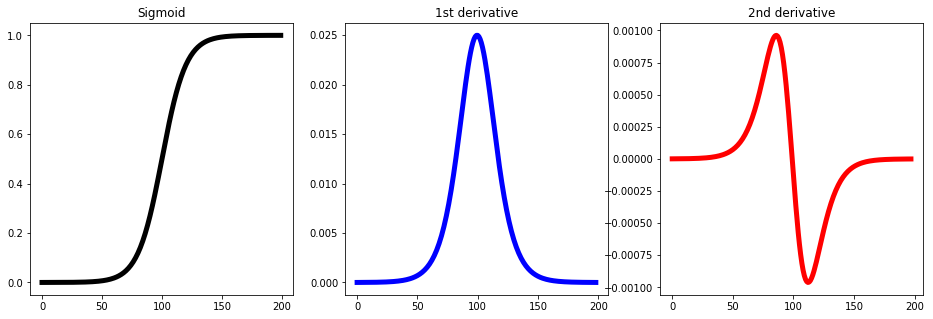

In [169]:
xx = np.arange(-10,10,0.1)
Sigmoid = 1/(1+np.exp(-xx))
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,5))
axes[0].plot(Sigmoid,'k',linewidth = 5)
axes[0].set_title('Sigmoid')
axes[1].plot(np.diff(Sigmoid),'b',linewidth = 5)
axes[1].set_title('1st derivative')
axes[2].plot(np.diff(Sigmoid,n = 2),'r',linewidth = 5)
axes[2].set_title('2nd derivative')

### `np.cumsum`
This function return the `cum`ulative `sum` of elements along a given axis. The cumulative sum of the i-th element of an array will be given by:

$$ cumsum[i] = \sum_{j=0}^{i} array[j] $$

If axis is not specified, it returns the cumulative sum along the entire array as if the array was flattened. 

In [30]:
print(array2D)
print('cumsum with no axis specified: \n', np.cumsum(array2D))
print('cumsum along axis 0: \n', np.cumsum(array2D, axis = 0))
print('cumsum along axis 1: \n', np.cumsum(array2D, axis = 1))

[[ 0  1  2  3  4  5]
 [ 0  2  4  6  8 10]
 [ 0  3  6  9 12 15]]
cumsum with no axis specified: 
 [ 0  1  3  6 10 15 15 17 21 27 35 45 45 48 54 63 75 90]
cumsum along axis 0: 
 [[ 0  1  2  3  4  5]
 [ 0  3  6  9 12 15]
 [ 0  6 12 18 24 30]]
cumsum along axis 1: 
 [[ 0  1  3  6 10 15]
 [ 0  2  6 12 20 30]
 [ 0  3  9 18 30 45]]


### Replication of arrays `np.tile`
In previous sessions we saw that we could replicate a list by just doing:

In [31]:
list_numbers = [0,1,2,3]
replicated_list = list_numbers*3
print(replicated_list)

[0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]


But if we try to do that with a numpy array:

In [32]:
array_numbers = np.array([0,1,2,3])
replicated_array = array_numbers*3
print(replicated_array)

[0 3 6 9]


In this case, we are not replicating the array but just multplying it by 3. If we want to replicate it `n` times, we have to make use of the `np.tile` function. `reps` will be the number of repetitions we want ot have. 

In [33]:
replicated_array = np.tile(array_numbers,reps = 3)
print(replicated_array)

[0 1 2 3 0 1 2 3 0 1 2 3]


We can also perform this in a 2D array. Repetitions will be performed along axis 0. 

In [34]:
replicated_array2D = np.tile(array2D,reps = 2)
print('array2D: \n', array2D)
print('replicated_array2D: \n', replicated_array2D)

array2D: 
 [[ 0  1  2  3  4  5]
 [ 0  2  4  6  8 10]
 [ 0  3  6  9 12 15]]
replicated_array2D: 
 [[ 0  1  2  3  4  5  0  1  2  3  4  5]
 [ 0  2  4  6  8 10  0  2  4  6  8 10]
 [ 0  3  6  9 12 15  0  3  6  9 12 15]]


### `np.where`
This function return the elements chosen from `x` or `y` depending on condition. <br/>
`np.where(condition, x, y)`: 
   - `condition`: where `True`, yield `x`, otherwise yield `y`.
   - `x`, `y`: Values from which to choose.
   
Let's first use the `np.where` without using `x`and `y`, only using `condition`. This will return us the indices where condition is `True`. 

In [35]:
print(array1D)
idxs_greater_2 = np.where(array1D>2)
print(idxs_greater_2)

[0 1 2 3 4 5]
(array([3, 4, 5]),)


Having this indices, we can obtain the values that meet this condition: (we will review indexing later, this is just a trailer)

In [36]:
print(array1D[idxs_greater_2])

[3 4 5]


Now we want to make use of `x`and `y` arguments: <br/>
In this example, we want the funtion to return as an array with the same shape as the original one where those elements greater than 2 are multplied by a factor of 10, and those which do not meet the condition, are returned as they originally were. 

In [37]:
print(array1D)
print(np.where(array1D>2,10*array1D,array1D))

[0 1 2 3 4 5]
[ 0  1  2 30 40 50]


### `np.nonzero`
This function returns the indices of the elements that are non-zero. If array is 1D, it just returns one array (one coordinate). If the array is n-dimensional, it returns an n-d array, where each array contains the specific coordinate for a point in that dimension. 

In [38]:
binary_array1D = [0,1,1,0,1,0,1]
print(binary_array1D)
print(np.nonzero(binary_array1D))

[0, 1, 1, 0, 1, 0, 1]
(array([1, 2, 4, 6]),)


If we do it for a 2D array:

In [39]:
array_aux = [[0,1,0,2],[0,0,32,0]]
print(array_aux)
print(np.nonzero(array_aux))

[[0, 1, 0, 2], [0, 0, 32, 0]]
(array([0, 0, 1]), array([1, 3, 2]))


We can do the same with boolean arrays:

In [40]:
boolean_array = [True, False, True, True, False]
print(np.nonzero(boolean_array))

(array([0, 2, 3]),)


### `np.argmax` and `np.argmin`
These functions return the indices of the maximum/minimum values along an axis.<br/>
If axis is not specified, it returns the index as if the array was flattened:

In [41]:
print(array2D)
print(np.argmax(array2D))
print(np.argmin(array2D))

[[ 0  1  2  3  4  5]
 [ 0  2  4  6  8 10]
 [ 0  3  6  9 12 15]]
17
0


Along axis = 0. It is important to remark that, if there is more than one element having the maximum, the function will just return the index of the first of them. 

In [42]:
print(array2D)
print(np.argmax(array2D, axis = 0))
print(np.argmin(array2D, axis = 0))

[[ 0  1  2  3  4  5]
 [ 0  2  4  6  8 10]
 [ 0  3  6  9 12 15]]
[0 2 2 2 2 2]
[0 0 0 0 0 0]


Along axis = 1

In [43]:
print(array2D)
print(np.argmax(array2D, axis = 1))
print(np.argmin(array2D, axis = 1))

[[ 0  1  2  3  4  5]
 [ 0  2  4  6  8 10]
 [ 0  3  6  9 12 15]]
[5 5 5]
[0 0 0]


Let's put that as an example: <br/>
With the Sigmoid plots from before and its derivatives, find the maximum and minimum and scatter those points in the plots.

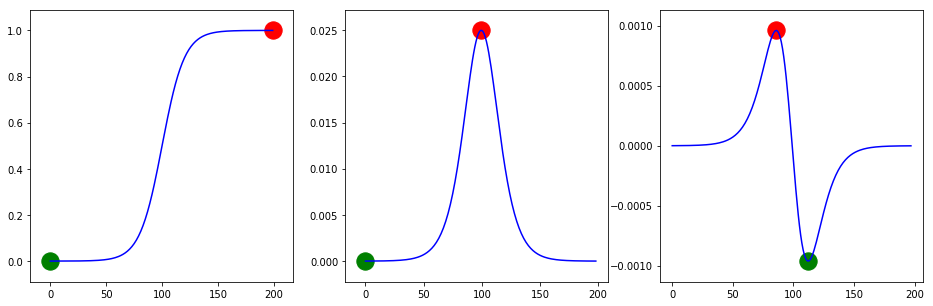

In [46]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,5))
# Sigmoid
axes[0].plot(Sigmoid,'b')
idx_max = np.argmax(Sigmoid)
idx_min = np.argmin(Sigmoid)
axes[0].scatter(idx_max, Sigmoid[idx_max], c = 'r', s = 300)
axes[0].scatter(idx_min, Sigmoid[idx_min], c = 'g', s = 300)
# 1st derivative
axes[1].plot(np.diff(Sigmoid),'b')
idx_max = np.argmax(np.diff(Sigmoid))
idx_min = np.argmin(np.diff(Sigmoid))
axes[1].scatter(idx_max, np.diff(Sigmoid)[idx_max], c = 'r', s = 300)
axes[1].scatter(idx_min, np.diff(Sigmoid)[idx_min], c = 'g', s = 300)
# 2nd derivative
axes[2].plot(np.diff(Sigmoid,n = 2),'b')
idx_max = np.argmax(np.diff(Sigmoid,n = 2))
idx_min = np.argmin(np.diff(Sigmoid,n = 2))
axes[2].scatter(idx_max, np.diff(Sigmoid,n = 2)[idx_max], c = 'r', s = 300)
axes[2].scatter(idx_min, np.diff(Sigmoid,n = 2)[idx_min], c = 'g', s = 300)

## 3. Indexing
### Array Indexing
Array indexing is the same as accessing an array element. You can access any array element by referring to its index number. Let's say we want to access the 4-th element of a 1D array:

In [60]:
fourth = array1D[3]
print(fourth)

3


If we have a 2D array, we can access its elements by typing the index of that element in each dimension. example: output the element in 3rd row and 4th column. 

In [62]:
print(array2D)
r3c4 = array2D[2,3]
print(r3c4)

[[ 0  1  2  3  4  5]
 [ 0  2  4  6  8 10]
 [ 0  3  6  9 12 15]]
9


We can also extract the elements of an array with some condition. Let's extract the elements of the 2D array that are even. One way of doing this is by the use of `np.where`:

In [76]:
even = np.where(array2D % 2 == 0)
print('array2D: \n', array2D)
print('The indices of the array2D where elements are even are: \n 1st dim: ', even[0], '\n 2nd dim: ', even[1] )
print('Odd elements of array2D are: \n', array2D[even[0],even[1]])

array2D: 
 [[ 0  1  2  3  4  5]
 [ 0  2  4  6  8 10]
 [ 0  3  6  9 12 15]]
The indices of the array2D where elements are even are: 
 1st dim:  [0 0 0 1 1 1 1 1 1 2 2 2] 
 2nd dim:  [0 2 4 0 1 2 3 4 5 0 2 4]
Odd elements of array2D are: 
 [ 0  2  4  0  2  4  6  8 10  0  6 12]


### Boolean arrays
Instead of having integer indices, we can also have boolean types. If we take the same example as before:

In [80]:
even = array2D%2 == 0
print(even)
print('Odd elements of array2D are: \n', array2D[even])

[[ True False  True False  True False]
 [ True  True  True  True  True  True]
 [ True False  True False  True False]]
Odd elements of array2D are: 
 [ 0  2  4  0  2  4  6  8 10  0  6 12]


## 4. Linear Algebra // Matrix Manipulation
### `np.dot`
The dot product is an algebraic operation that takes two equal-length sequences of numbers (usually coordinate vectors) and returns a single number. Algebraically, the dot product is the sum of the products of the corresponding entries of the two sequences of numbers. 

$$
\begin{bmatrix}
u_1 & u_2 & u_3
\end{bmatrix}
\begin{bmatrix}
v_1 \\
v_2 \\
v_3
\end{bmatrix}
= u_1·v_1 + u_2·v_2 + u_3·v_3 = \overrightarrow{U} · \overrightarrow{V}
$$

In [89]:
u = [1, 2, 3, 4, 5]
v = [0, 1, 2, 0, 1]
dot_prod = np.dot(u,v)
print(dot_prod)

13


### `np.diag`
Return the diagonal of a 2D array. If array is 1D, it constructs a matrix of zeros where the array will be the diagonal. 

In [97]:
# construct
diag1D = np.diag(array1D)
print(diag1D)
# diagonal from 2D array
array_diag = [[0,1,2],[3,4,5],[6,7,8]]
diag2D = np.diag(array_diag)
print(array_diag)
print(diag2D)

[[0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 4 0]
 [0 0 0 0 0 5]]
[[0, 1, 2], [3, 4, 5], [6, 7, 8]]
[0 4 8]


### `np.diagonal`
If array is 2-D, returns the diagonal of a with the given offset.

In [99]:
print('array2D: \n', array2D)
print('diagonal offset 0: \n', np.diagonal(array2D, offset = 0))
print('diagonal offset 1: \n', np.diagonal(array2D, offset = 1))
print('diagonal offset 2: \n', np.diagonal(array2D, offset = 2))

array2D: 
 [[ 0  1  2  3  4  5]
 [ 0  2  4  6  8 10]
 [ 0  3  6  9 12 15]]
diagonal offset 0: 
 [0 2 6]
diagonal offset 1: 
 [1 4 9]
diagonal offset 2: 
 [ 2  6 12]


### `np.transpose`
Permute the dimensions of an array.
$$
\begin{bmatrix}
a_1 & a_2 \\
a_3 & a_4 \\
a_5 & a_6
\end{bmatrix}^T
= \begin{bmatrix}
a_1 & a_3 & a_5\\
a_2 & a_4 & a_6\\
\end{bmatrix}
$$

In [100]:
print('array2D: \n', array2D)
print('array2D tranposed: \n', np.transpose(array2D))

array2D: 
 [[ 0  1  2  3  4  5]
 [ 0  2  4  6  8 10]
 [ 0  3  6  9 12 15]]
array2D tranposed: 
 [[ 0  0  0]
 [ 1  2  3]
 [ 2  4  6]
 [ 3  6  9]
 [ 4  8 12]
 [ 5 10 15]]


### `np.eye`
Return a 2-D array with ones on the diagonal and zeros elsewhere. `N:` number of rows. `M:`number of columns, if `M` not specified, `M = N`.

In [102]:
print(np.eye(N = 5))

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [104]:
print(np.eye(N = 5, M = 10))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### `np.trace`
The trace of a square matrix is defined as the sum of elements in the main diagonal (or offset). 

In [118]:
array_diag = [[0,1,2,3],[3,4,5,6],[6,7,8,9],[0,1,2,1]]
print('matrix: \n', array_diag)
print(np.trace(array_diag, offset = 0))
print(np.trace(array_diag, offset = 1))
print(np.trace(array_diag, offset = -1))

matrix: 
 [[0, 1, 2, 3], [3, 4, 5, 6], [6, 7, 8, 9], [0, 1, 2, 1]]
13
15
12


### `np.triu` and `np.tril`
Returns the upper or lower triangles of the matrix. k is the offset for the main diagonal. 


In [122]:
np.triu(array_diag, k = 0)

array([[0, 1, 2, 3],
       [0, 4, 5, 6],
       [0, 0, 8, 9],
       [0, 0, 0, 1]])

In [123]:
np.tril(array_diag, k = 0)

array([[0, 0, 0, 0],
       [3, 4, 0, 0],
       [6, 7, 8, 0],
       [0, 1, 2, 1]])

In [126]:
np.tril(array_diag, k = 1)

array([[0, 1, 0, 0],
       [3, 4, 5, 0],
       [6, 7, 8, 9],
       [0, 1, 2, 1]])

# Exercises

## Ex 1

The covariance matrix (as the correlation matrix) is a symmetric matrix such that the covariance between time series $i$ and $j$ is the same as the covariance of $j$ and $i$: $C_{ij} = C_{ji}$. On the diagonal of the covariance matrix there are the values of the variance of each time series.

Write a function that take a sequence of `p` time series, calculates the $p$ x $p$ covariance matrix and returns a vector of length $p(p-1)/2$ with the covariance values without repetitions and without the variance elements.

## Ex 2

Modify the function `make_linear_data` from previous session in order to build data that depends linearly on more than one variable. The model will be $y_i = c + \sum_{j=1}^{P} a_j x_{ij} + b \eta_i$, so that $x$ will be now a matrix with as many rows as samples and as many columns as variables.
1. Generate `x` as random samples from the uniform distribution. `np.random.rand(3, 4)` generates uniformly distributed data from 0 to 1 in an array of shape `(3, 4)`.
2. Add a parameter to choose the number of dimensions of `x`.

It's ok if you want to start with an iterative solution but your final code should make use of the dot product.

## Ex 3
As we did in previous sessions, create a function that:
- Plots a sinusoidal function given a certain frequency value and time range.
$$ y_i(t) = A  sin(2\pi f t_i)$$
- Has the possibility of adding noise to the signal. 
$$ y_i(t) = A  sin(2\pi f t_i) + b \eta_i$$
- Plots/Scatters **ALL** the maximums (in red) and minimums (in green) in the same plot. 
The arguments of the function have to be:
- `A`: Amplitude of the sinousoidal (int or float).
- `f`: Frequency (int or float).
- `noise`: Noise if noise is not wanted, int or float if wanted. The value will correspond to $b$.
- `time_range:`: 2-element array/list with the limits of time to plot the sinousoidal function, e.g. `time_range = [0, 100]`, the plot will go from 0 to 100 seconds. Check that `time_range[0] < time_range[1]`.
- `samp_freq`: Sampling frequency of the signal (int). The sampling frequency is generally defined as the number of samples obtained in one second. In this case, when buidling the time array, its length should be: `samp_freq * (time_range[1] - time_range[0])`.

## Ex 4
Given the following time array, extract the average sampling frequency. The sampling frequency `[in Hz]` is defined as the inverse of the average differences.

In [ ]:
time = [0, 0.0149, 0.0787, 0.1793, 0.303, 0.399,  0.495,  0.5991, 0.7019, 0.8067, 0.9142,
 0.9853, 1.0847, 1.1885, 1.3013, 1.4096, 1.5103, 1.5957, 1.7018, 1.7911, 1.9006,
 2.0072, 2.1093, 2.2114, 2.2988, 2.3992, 2.5058, 2.6027, 2.7094, 2.7829, 2.8819,
 2.9791, 3.0855, 3.207,  3.3079, 3.3937, 3.4825, 3.6054, 3.6979, 3.8029, 3.9001,
 4.0029, 4.1028, 4.2036, 4.2965, 4.3943, 4.4806, 4.6013, 4.6924, 4.7908, 4.9095]

## Ex 5
Try to answer the following questions without executing any code. Think about them, and only if you know the answer for right, execute the code to validate it. <br/>

Given the `array = [0,1,2,3,4]`:
1. Is `np.cumsum(array)[-1] == np.sum(array)`? 
2. What if the array is `array_sorted_descending = sorted(array)[::-1]`? `sorted()` just sorts the array in ascending order. `[::-1]` just flips the array. 
3. Is `np.trace(np.diag(array)) == np.sum(array)`?
4. How many dimensions will have
    - `array_nd = [array*3]`? 
    - `array_nd = np.tile(array,3)`? 
    - `array_nd = np.tile(array,3).reshape(3,5)`?
5. Given `array_nd = np.tile(array,3).reshape(3,5)`, what is its transpose `array_nd_transpose`? Write it on a separate sheet and then validate it. 
6. Given `array_nd_transpose`, what is the output of:
    - `np.trace(array_nd_transpose, offset = 0)`? 
    - `np.trace(array_nd_transpose, offset = -2)`
    - `np.sum(np.triu(array_nd_transpose, k = 0))`
    - `np.sum(np.tril(array_nd_transpose, k = 1))`
7. Given the binary array `bin_array = [0, 0, 0, 0, 1, 0, 0, 1]`, and the previous `array`, what is the output of:
    - `np.argmax(bin_array)-np.argmin(bin_array)`?
    - `np.argmax(array)-np.argmin(bin_array)`?
    - `np.argmin(array)-np.argmin(bin_array)`?